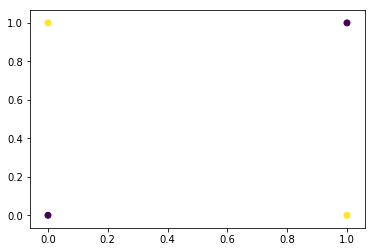

L2 =0.01, final w,time,J [-1.59308455 -8.07078978  3.61555494  3.61555494] 499999 0.5177690215604144
Classificatio rate: 1.0


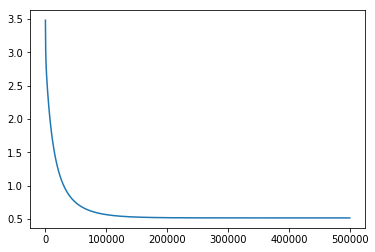

In [34]:
#feature engineering adding xy

import numpy as np
import matplotlib.pyplot as plt

N=4
D=2

X=np.array([[0, 0],[0,1],[1,0],[1,1]])
T=np.array([0,1,1,0])
xy=np.array([X[:,0]*X[:,1]]).T
plt.scatter(X[:,0],X[:,1],c=T)
plt.show()
ones_=np.ones((N,1))
Xn=np.concatenate((ones_,xy,X),axis=1)
w=np.random.randn(D+2)


z=np.dot(Xn,w)
epsilon=1e-10
iteration=500000
L2=0.01
alpha=0.001    # learning rate
j_cost=[]


def sigmoid(z):
    return 1/(1+np.exp(-z))

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)

Y_n=sigmoid(np.dot(Xn,w))

for time in range(iteration):

    derivative=np.dot(Xn.T,(T-Y_n))-0.01*w        #L2=0.01
    w=w+alpha*derivative                                   
    Y_n=sigmoid(np.dot(Xn,w))
    
    if (time%1==0):
        j_cost.append(cross_entropy_err(Y_n,T))
        
plt.plot(j_cost)    

print('L2 =0.01, final w,time,J',w,time,cross_entropy_err(Y_n,T))
print('Classificatio rate:', 1-np.abs(T-np.round(Y_n)).sum()/N)

In [29]:
Xn

array([[1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 1., 1., 1.]])